In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils.transform import Transform
from riskfuel_test import riskfuel_test
import torch

In [2]:
transform = Transform(use_boxcox=True)

<AxesSubplot: ylabel='Count'>

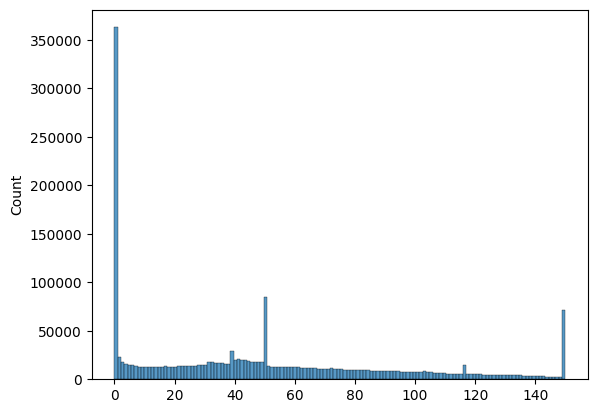

In [3]:
df = pd.read_csv("dataset/testing_data_2.csv")
values = df.value.to_numpy()
sns.histplot(values)

In [12]:
X_df = df[["S", "K", "T", "r", "sigma"]]
X_df = X_df.to_numpy()
X = transform.transform_x(X_df)

In [9]:
idx = 1869905
print(X[idx,0])
print(X[idx,1])
print(X[idx,2])
print(X[idx,3])
print(X[idx,4])
print(values[idx])

0.6666666666666665
1.0
1.0
0.0
0.5555555555555555
101.5004293704478


<AxesSubplot: ylabel='Count'>

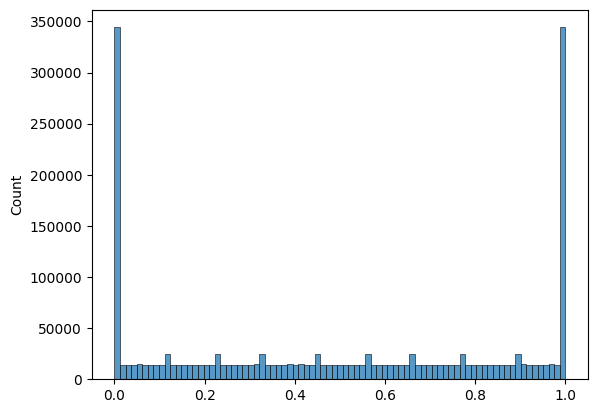

In [14]:
sns.histplot(X[:,1])

<AxesSubplot: ylabel='Count'>

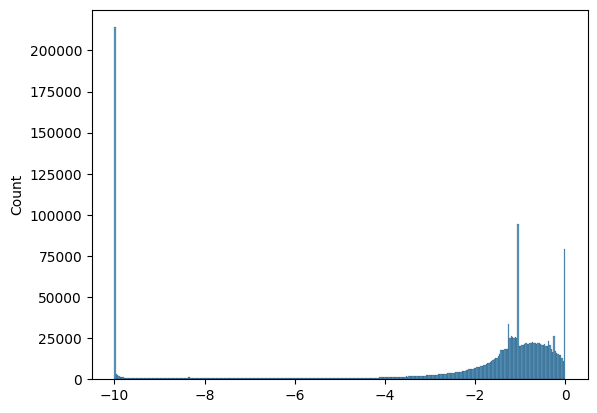

In [17]:
values1 = transform.transform_y(values)
sns.histplot(values1)

<AxesSubplot: ylabel='Count'>

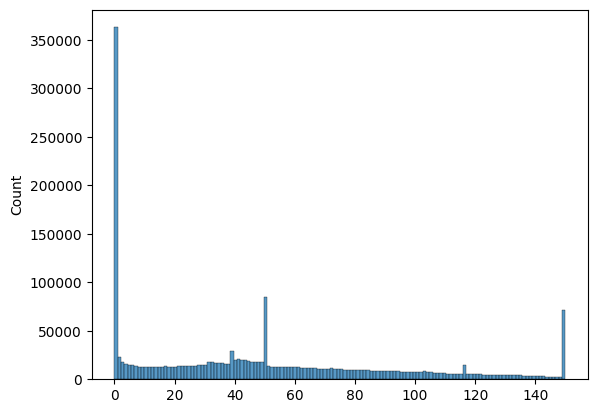

In [18]:
values2 = transform.inverse_transform_y(values1)
sns.histplot(values2)

In [15]:
df = pd.read_csv("dataset/training_data.csv")
df.describe()

,Unnamed: 0,S,K,T,r,sigma,value
count,1.900000e+06,1.900000e+06,1.900000e+06,1.900000e+06,1.900000e+06,1.900000e+06,1.900000e+06
mean,9.499995e+05,1.000464e+02,1.000070e+02,2.501355e+00,2.549821e-02,7.748571e-01,4.951913e+01
std,5.484829e+05,7.497185e+01,3.746766e+01,1.873739e+00,1.836410e-02,5.434481e-01,4.357089e+01
min,0.000000e+00,1.401298e-45,5.000000e+01,1.401298e-45,1.000000e-03,5.000000e-02,0.000000e+00
25%,4.749998e+05,2.324676e+01,6.168294e+01,5.830025e-01,6.684674e-03,2.184989e-01,8.827301e+00
50%,9.499995e+05,1.001017e+02,9.998225e+01,2.503770e+00,2.550032e-02,7.749651e-01,4.296689e+01
75%,1.424999e+06,1.768377e+02,1.383502e+02,4.418948e+00,4.428640e-02,1.331449e+00,7.708590e+01
max,1.899999e+06,2.000000e+02,1.500000e+02,5.000000e+00,5.000000e-02,1.500000e+00,1.500000e+02


In [4]:
performance_metric, max_loss, max_loss_idx, y_hat = riskfuel_test(df)



 ============ Evaluating Student: Vignesh Edithal ========================= 
 Full name:
 Vignesh Edithal
 Student ID:
 edithals



<AxesSubplot: ylabel='Count'>

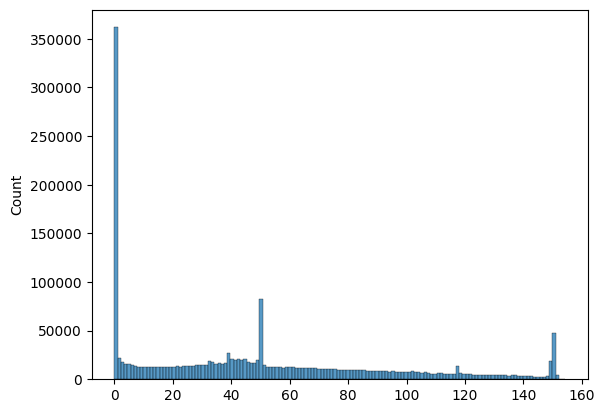

In [7]:
sns.histplot(y_hat)

In [24]:
y = torch.Tensor(df[["value"]].to_numpy()).flatten()
diffs, diffs_idx = torch.sort(torch.abs(y - y_hat), descending=True)

In [25]:
diffs_idx[:100]

tensor([1869905, 1879905, 1868905,  457977, 1809606, 1803002,  318799,  522563,
         802549, 1869904,  404861, 1869915, 1809607,  130015, 1829239,  491017,
         469871, 1829249, 1829229, 1809616,  772356,  992114, 1868915,  395453,
         386800,  302034,  963924,   58426,  399405,  667441,  920678, 1819259,
        1802003,  197277,  594682,  496326,  234855,  158189, 1819249,   58219,
        1879904, 1859841,  621967,  141953, 1829219,  400461,   38160,  464488,
         250655,  937325, 1803012,  518174,  651565,  909999,  796088, 1868904,
         104825, 1869925,  176555,  424999,  336623,  866624,  621081,  999750,
         448172,  766150,  350288,  883806,  622670,  340818, 1859831,  392107,
        1809605,  357256,  954603,  707272, 1827063,   20965,  206074, 1827073,
         670943,  654884, 1859931, 1879915, 1809626,  472088,  230994,  494983,
         543015,  904129,  493508,  785660, 1819559,  300867, 1815002,  991004,
         235102,  335619,  350182,  3564